# A Predictive Analysis of Loan Data 

### Source of Data - https://www.kaggle.com/zhijinzhai/loandata

In [246]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# importing th Dataset

a=pd.read_csv("C:\\Users\\dell\\Desktop\\Data Science\\Loan payments data.csv")

In [247]:
# Information of the Dataset

a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 29.3+ KB


In [248]:
# First 5 rows of the Dataset

a.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [249]:
# Cleaning and transforming the data for futher data analysis

list_edu=[]
for i in a['education']:
    list_edu.append(i)
l=LabelEncoder()
l.fit(list_edu)
l1=l.transform(list_edu)

list_gen=[]
for i in a['Gender']:
    list_gen.append(i)
l.fit(list_gen)
l2=l.transform(list_gen)

list_loan_stat=[]
for i in a['loan_status']:
    list_loan_stat.append(i)
l.fit(list_loan_stat)
l3=l.transform(list_loan_stat)

new_a=pd.DataFrame({'loan_status':l3,'Principal':a['Principal'],'terms':a['terms'],'age':a['age'],'education':l1,'Gender':l2,'loan_status':a['loan_status'],'past_due_days':a['past_due_days']})
new_a['past_due_days']=new_a['past_due_days'].fillna(0)
new_a

,Gender,Principal,age,education,loan_status,past_due_days,terms
0,1,1000,45,1,PAIDOFF,0.0,30
1,0,1000,50,0,PAIDOFF,0.0,30
2,0,1000,33,0,PAIDOFF,0.0,30
3,1,1000,27,3,PAIDOFF,0.0,15
4,0,1000,28,3,PAIDOFF,0.0,30
5,1,300,35,2,PAIDOFF,0.0,7
6,1,1000,29,3,PAIDOFF,0.0,30
7,1,1000,36,3,PAIDOFF,0.0,30
8,1,1000,28,3,PAIDOFF,0.0,30
9,1,800,26,3,PAIDOFF,0.0,15


--------------------------------------------------------------------------------------------------------------------------------
### In the above table, the transformation from string to integer are as follows - 
### For Gender
###### 0 --- Female 
###### 1 --- Male
### For education
###### 0 --- Bachelor 
###### 1 --- High School or below 
###### 2 --- Master or Above
###### 3 --- college
--------------------------------------------------------------------------------------------------------------------------------

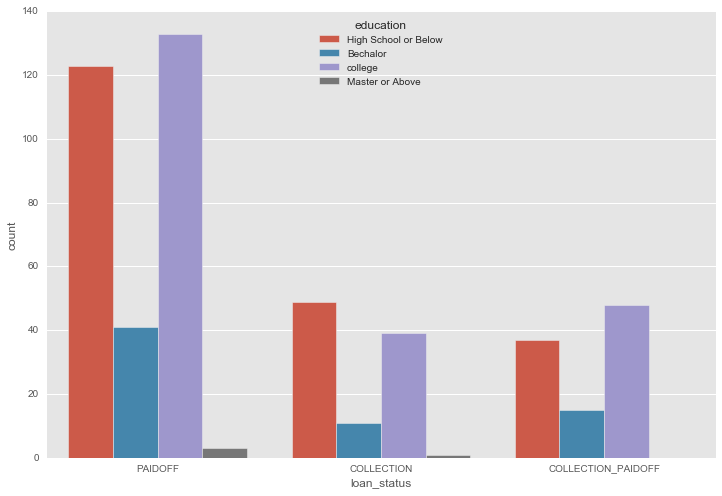

In [250]:
# Data Visualization

plt.figure(figsize=(12,8))
sns.countplot( x = "loan_status",hue = "education", data=a)
plt.show()

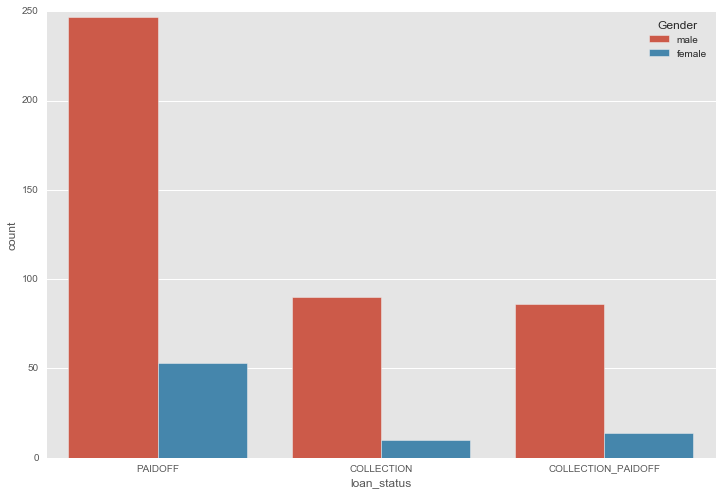

In [251]:
plt.figure(figsize=(12,8))
sns.countplot( x = "loan_status",hue = "Gender", data=a)
plt.show()

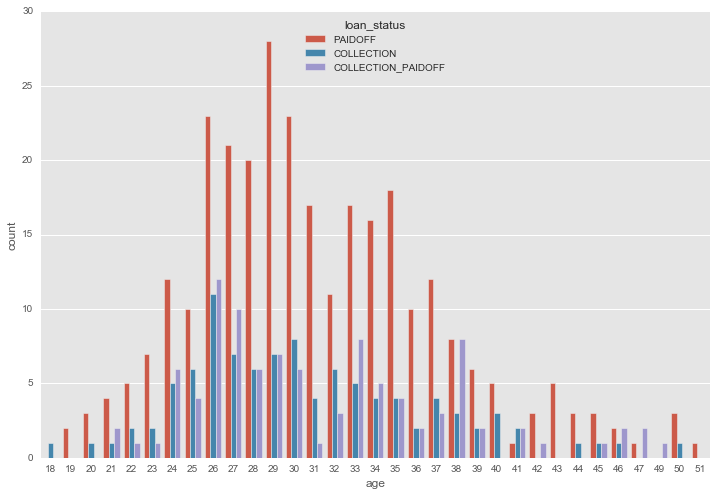

In [252]:
plt.figure(figsize=(12,8))
sns.countplot( x = "age",hue = "loan_status", data=a)
plt.show()

# Machine Learning

### K-Nearest Neighbors Classifier

In [253]:
x=new_a.drop('loan_status',axis=1).values
y=new_a['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=21)
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn_test=knn.score(x_test,y_test)
knn_train=knn.score(x_train,y_train)
cv_results1=cross_val_score(knn,x,y,cv=5)
print(cv_results1)

[ 0.88  0.86  0.89  0.89  0.9 ]


### Gaussian Naive Bayes Classifier 

In [254]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
gnb_test=gnb.score(x_test,y_test)
gnb_train=gnb.score(x_train,y_train)
cv_results2=cross_val_score(gnb,x,y,cv=5)
print(cv_results2)

[ 0.99  0.99  0.98  0.98  0.96]


### Multinomial Naive Bayes Classifier 

In [255]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
mnb_test=mnb.score(x_test,y_test)
mnb_train=mnb.score(x_train,y_train)
cv_results3=cross_val_score(gnb,x,y,cv=5)
print(cv_results3)

[ 0.99  0.99  0.98  0.98  0.96]


### Binomial Naive Bayes Classifier 

In [256]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
bnb_test=bnb.score(x_test,y_test)
bnb_train=bnb.score(x_train,y_train)
cv_results4=cross_val_score(gnb,x,y,cv=5)
print(cv_results4)

[ 0.99  0.99  0.98  0.98  0.96]


### SVM Classifier

In [257]:
clf=SVC(C=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
clf_test=clf.score(x_test,y_test)
clf_train=clf.score(x_train,y_train)
cv_results5=cross_val_score(clf,x,y,cv=5)
print(cv_results5)

[ 0.9   0.91  0.94  0.87  0.9 ]


### Random Forest

In [258]:
rnd=RandomForestClassifier(n_estimators=100)
rnd.fit(x_train,y_train)
y_pred=rnd.predict(x_test)
rnd_test=rnd.score(x_test,y_test)
rnd_train=rnd.score(x_train,y_train)
cv_results6=cross_val_score(clf,x,y,cv=5)
print(cv_results6)

[ 0.9   0.91  0.94  0.87  0.9 ]


# Results

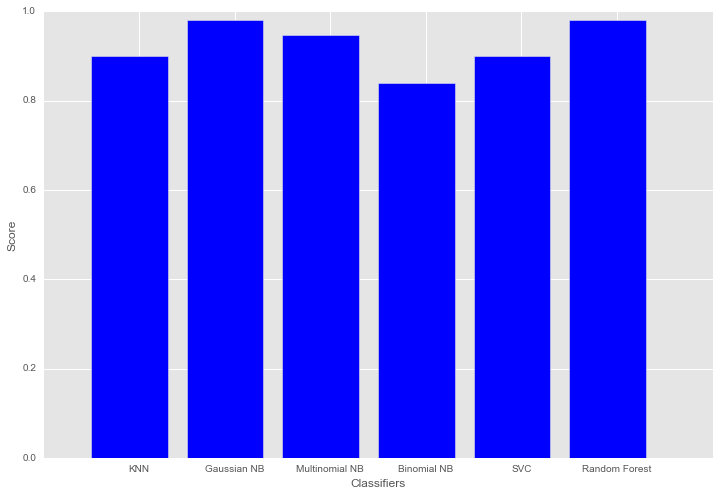

In [259]:
x=[1.5,2.5,3.5,4.5,5.5,6.5]
y=[knn.score(x_test,y_test),gnb.score(x_test,y_test),mnb.score(x_test,y_test),bnb.score(x_test,y_test),clf.score(x_test,y_test),rnd.score(x_test,y_test)]
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.bar(x,y,color='blue')
plt.xticks(range(2,8),['KNN','Gaussian NB','Multinomial NB','Binomial NB','SVC','Random Forest'])
plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.show()

#### Gaussian Naive Bayes Classifier and Random Forest Classifier has the highest accuracy (i.e. 0.98). 

In [260]:
# Model Comparision

df = pd.DataFrame({'Model':['K-Nearest Neighbors','Gaussian NB','Multinomial NB','Binomial NB','SVM','Random Forest'],
                  'Test_Score':[knn_test,gnb_test,mnb_test,bnb_test,clf_test,rnd_test],
                  'Train_Score':[knn_train,gnb_train,mnb_train,bnb_train,clf_train,rnd_train]})
df.sort_values(by='Test_Score',ascending=False)

,Model,Test_Score,Train_Score
1,Gaussian NB,0.980000,0.980000
5,Random Forest,0.980000,1.000000
2,Multinomial NB,0.946667,0.948571
0,K-Nearest Neighbors,0.900000,0.920000
4,SVM,0.900000,1.000000
3,Binomial NB,0.840000,0.802857


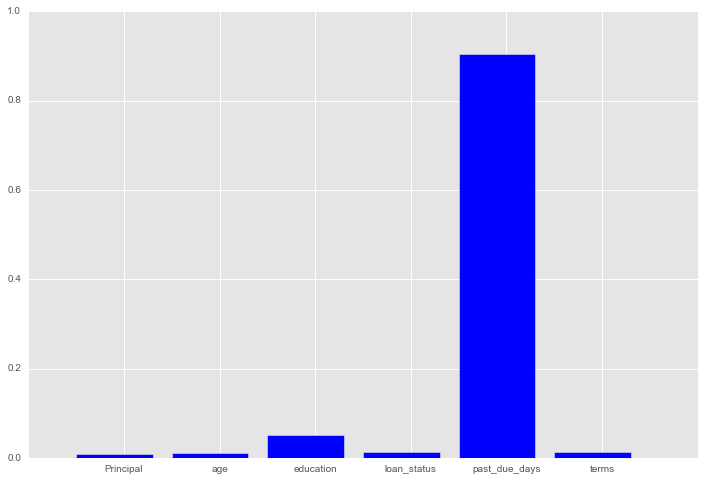

In [261]:
# Random Forest Importance Ranking

x=[0.5,1.5,2.5,3.5,4.5,5.5]
feature_names = new_a.columns.delete(0)
index = np.arange(len(feature_names))
plt.figure(figsize=(12,8))
plt.bar(x,rnd.feature_importances_,color='blue')
plt.xticks(range(1,7),feature_names)
plt.show()

In [262]:
rnd.feature_importances_

array([ 0.00785926,  0.00997204,  0.05215076,  0.01407611,  0.90398556,
        0.01195627])

# Declaration

The above study is the author's original work. All sources have been mentioned where necessary.

####           Arnab Deka

(arnabdeka6@gmail.com)